# Filter out non English content and Clean text from hyperlinks

output:
 - *data/processed/final_repo_english_whatwhy.csv*
 
 
## get the language of each text for heading and content

In [1]:
import pandas as pd
from langdetect import detect
import langdetect
import numpy as np

In [2]:
file_path = '../../data/processed/repositories_with-readme_what-why-code_content.csv'


In [3]:
df = pd.read_csv(file_path)

In [5]:
df.columns

Index(['local_readme_file', 'file_id', 'section_id', 'url_readme',
       'heading_markdown', 'abstracted_heading_markdown', 'heading_text',
       'abstracted_heading_text', 'heading_level', 'section_code',
       'content_text_w_o_tags', 'index', 'id', 'created_at', 'description',
       'language', 'name', 'owner_id', 'readme_file_name', 'readme_name',
       'readme_words_num', 'updated_at', 'url', 'watchers', 'repo_labels',
       'all_languages', 'members_ids', 'members_number', 'topics',
       'has_whatwhy'],
      dtype='object')

In [6]:
#langs = [detect(x) for x in df['heading_text'].values.tolist() ]

def get_natural_languages(df, col):
    nls = []
    errors = {'empty':0} 
    for x in df['heading_text'].values.tolist():
        try:
            if x is not None and (x.strip() != ''):
                nls.append(detect(x))
            else:
                errors['empty'] += 1
        except Exception as e:
            errors[str(e)] = errors[str(e)]+1 if str(e) in errors.keys() else 1
    counts = (pd.Series(nls)).value_counts()
    counts = counts.sort_values()
    return counts, errors
#heading_txt_nl_counter, heading_txt_nl_errors = get_natural_languages(df, 'heading_text')
#section_ctx_nl_counter, section_ctx_nl_errors = get_natural_languages(df, 'content_text_w_o_tags')



In [7]:

def _get_lang(txt):
    res = 'EMPTY'
    try:
        if txt is not None and (txt.strip() != ''):
            res =detect(txt)
    except Exception as e:
         res = str(e).upper()
    return res

def add_nl(row):
    row['heading_lang'] = _get_lang(row['heading_text'])
    row['text_lang'] = _get_lang(row['content_text_w_o_tags'])
    return row
    

In [8]:
df = df.apply(add_nl, axis=1)

In [9]:
len(df[df['heading_lang'] == 'en'])

16964

In [10]:
len(df[df['text_lang'] == 'en'])

24993

In [11]:
len(df[df['text_lang'] != 'en'])

3939

In [12]:
len(df[(df['heading_lang'] == 'en') & (df['text_lang'] == 'en')])

14588

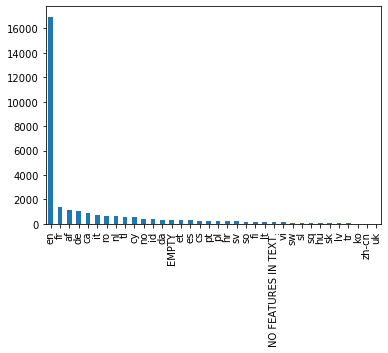

In [13]:
df['heading_lang'].value_counts().plot(kind='bar')


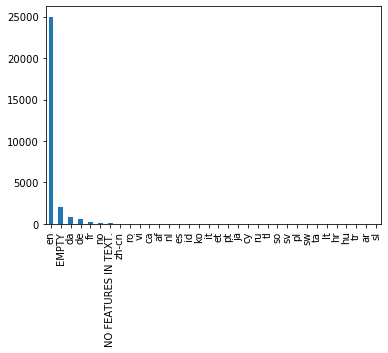

In [14]:
df['text_lang'].value_counts().plot(kind='bar')


In [15]:
en_df = df[df['text_lang'] == 'en']

In [ ]:
#en_df.to_csv('../../data/processed/repository-sections_with-readme_what-why-code_content_en.csv')


## Combining what why in one section

In [6]:


#'../data/repositories_with-readme_what-why-code_content_en.csv'
#repository-sections_with-readme_what-why-code_content_en.csv
en_sec_df = pd.read_csv('../data/processed/repository-sections_with-readme_what-why-code_content_en.csv')

In [7]:
len(en_sec_df['url'].unique())
len(en_sec_df)

24988

In [20]:
en_sec_df.columns

Index(['Unnamed: 0', 'local_readme_file', 'file_id', 'section_id',
       'url_readme', 'heading_markdown', 'abstracted_heading_markdown',
       'heading_text', 'abstracted_heading_text', 'heading_level',
       'section_code', 'content_text_w_o_tags', 'index', 'id', 'created_at',
       'description', 'language', 'name', 'owner_id', 'readme_file_name',
       'readme_name', 'readme_words_num', 'updated_at', 'url', 'watchers',
       'repo_labels', 'all_languages', 'members_ids', 'members_number',
       'topics', 'has_whatwhy', 'heading_lang', 'text_lang'],
      dtype='object')

In [21]:
cols_per_repo = ['local_readme_file', 'file_id', 'url_readme','created_at',
                 'language', 'name',  'owner_id', 'updated_at', 'url', 'watchers', 
                 'members_number', 'repo_labels', 'all_languages', 'topics', 'description',
                 'members_ids'
        ]
# , repo_labels, all_languages, members_ids


cols_to_combine = ['content_text_w_o_tags', 'section_id'  ]
all_cols = cols_per_repo.copy()
all_cols.extend(cols_to_combine)


In [22]:
en_df =en_sec_df[all_cols].copy()
en_df['content_text_w_o_tags'].fillna('', inplace=True)
en_df['repo_labels'].fillna('', inplace=True)
en_df['all_languages'].fillna('', inplace=True)
en_df['topics'].fillna('', inplace=True)
en_df['description'].fillna('', inplace=True)
en_df['members_ids'].fillna('', inplace=True)


In [23]:
english_repo_df = en_df.groupby(cols_per_repo, as_index = False).agg({'content_text_w_o_tags': '\n'.join, 'section_id': list,
                                                 
                                                          })

In [24]:
len(english_repo_df)

13264

In [26]:
len(english_repo_df.file_id.unique())

13264

In [236]:
#english_repo_df.to_csv('../data/processed/final_repo_english_whatwhy.csv', index=False)

## Preprocessing

In [27]:
import re
#english_repo_df = pd.read_csv('../data/processed/final_repo_english_whatwhy.csv', index_col='file_id')
english_repo_df['content_clean'] = english_repo_df['content_text_w_o_tags'].map(lambda x: re.sub(r'\<(http|https)://(.*?)\>', '', x))
english_repo_df['content_clean'] = english_repo_df['content_clean'].map(lambda x: re.sub(r'(http|https)://(.*?)\ ', '', x))
english_repo_df['content_clean'] = english_repo_df['content_clean'].map(lambda x: x.lower())
english_repo_df['content_clean'] = english_repo_df['content_clean'].map(lambda x: x.strip())

In [29]:
# save
english_repo_df.to_csv('../../data/processed/final_repo_english_whatwhy.csv', index=False)


In [4]:
en_ = pd.read_csv('../../data/processed/final_repo_english_whatwhy.csv', index_col='file_id')
#len(pd.read_csv('../data/processed/final_repo_english_whatwhy.csv', index_col='file_id'))

In [5]:
en_

,local_readme_file,url_readme,created_at,language,name,owner_id,updated_at,url,watchers,members_number,repo_labels,all_languages,topics,description,members_ids,content_text_w_o_tags,section_id,content_clean
file_id,,,,,,,,,,,,,,,,,,
3,00111000.Imports-in-Python.md,https://github.com/00111000/Imports-in-Python,2017-08-02 05:43:22,Python,Imports-in-Python,9595141,2019-04-26 04:28:08,https://api.github.com/repos/00111000/Imports-...,194,0,NaN,NaN,NaN,:snake: A guide on how importing works in Python.,NaN,Relative imports - specific location of the mo...,[6],relative imports - specific location of the mo...
5,0101.pipetools.md,https://github.com/0101/pipetools,2012-09-25 18:42:03,Python,pipetools,411138,2019-05-22 09:32:08,https://api.github.com/repos/0101/pipetools,80,1,"bug, duplicate, enhancement, invalid, question...","css, python",NaN,Functional plumbing for Python,411138,Complete documentation in full color <http:// ...,"[1, 2]",complete documentation in full color _. .. im...
7,01org.CeTune.md,https://github.com/01org/CeTune,2015-02-12 02:57:45,Python,CeTune,16283,2019-04-25 15:56:19,https://api.github.com/repos/01org/CeTune,101,0,"bug, enhancement, new feature","css, html, javascript, python, shell",NaN,NaN,NaN,"CeTune is a toolkit/framework to deploy, benc...","[1, 9]","cetune is a toolkit/framework to deploy, bench..."
8,01org.virtual-storage-manager.md,https://github.com/01org/virtual-storage-manager,2014-08-15 15:26:19,Python,virtual-storage-manager,16283,2019-02-17 20:40:28,https://api.github.com/repos/01org/virtual-sto...,172,12,"bug, duplicate, enhancement, help wanted, inva...","css, erlang, html, javascript, makefile, pytho...",NaN,NaN,"1860856, 4658018, 4673989, 5556435, 5983651, 5...",Travis CI: @abstr_hyperlink @abstr_image Vir...,[1],travis ci: @abstr_hyperlink @abstr_image vir...
9,05bit.peewee-async.md,https://github.com/05bit/peewee-async,2014-09-27 22:15:28,Python,peewee-async,131314,2019-05-31 02:28:31,https://api.github.com/repos/05bit/peewee-async,526,0,"bug, duplicate, enhancement, help wanted, inva...",python,NaN,Asynchronous interface for peewee ORM powered ...,NaN,Asynchronous interface for @abstr_hyperlink OR...,"[1, 3]",asynchronous interface for @abstr_hyperlink or...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20581,zzh8829.yolov3-tf2.md,https://github.com/zzh8829/yolov3-tf2,2019-04-03 17:57:49,Python,yolov3-tf2,663221,2019-05-30 22:58:46,https://api.github.com/repos/zzh8829/yolov3-tf2,170,0,"bug, duplicate, enhancement, good first issue,...","etag, python",NaN,YoloV3 Implemented in Tensorflow 2.0,NaN,[x] TensorFlow @abstr_number . @abstr_number ...,"[2, 18]",[x] tensorflow @abstr_number . @abstr_number ...
20585,zzw922cn.Automatic_Speech_Recognition.md,https://github.com/zzw922cn/Automatic_Speech_R...,2016-11-13 03:51:07,Python,Automatic_Speech_Recognition,8018789,2019-05-31 08:29:43,https://api.github.com/repos/zzw922cn/Automati...,2567,3,"question, toWatch",NaN,NaN,End-to-end automatic speech recognition from s...,"11907885, 30406942, 30684796",End-to-end automatic speech recognition system...,"[1, 8, 12, 14]",end-to-end automatic speech recognition system...
20586,zzz24512653.CommunityDetection.md,https://github.com/zzz24512653/CommunityDetection,2015-03-22 15:00:23,Python,CommunityDetection,7483319,2019-05-29 02:43:39,https://api.github.com/repos/zzz24512653/Commu...,159,0,NaN,"css, java, python, scala, xslt",NaN,Implements of community detection algorithms,NaN,@abstr_number . Community structure in social ...,[12],@abstr_number . community structure in social ...
